In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [3]:
# Read in the california housing data set
ca_housing = pd.read_csv("../Resources/California_Housing.csv")
ca_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


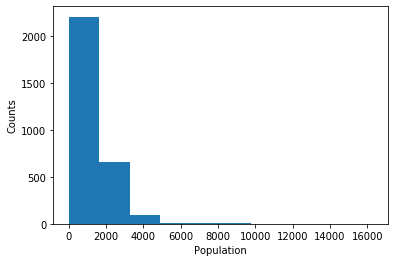

1387.9633333333334
1152.5
0    1128.0
dtype: float64


In [7]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(ca_housing["Population"])
plt.xlabel("Population")
plt.ylabel("Counts")
plt.show()
print(ca_housing['Population'].mean())
print(ca_housing['Population'].median())
print(ca_housing['Population'].mode())

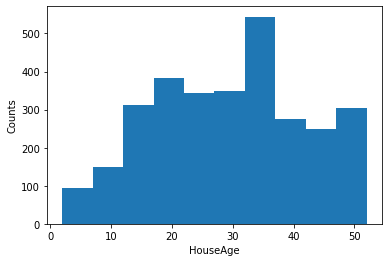

NormaltestResult(statistic=5.203914415668814, pvalue=0.0741283515509046)


In [17]:
# Determine if the house age in California is considered normally distributed
plt.hist(ca_housing["HouseAge"])
plt.xlabel("HouseAge")
plt.ylabel("Counts")
plt.show()
print(sts.normaltest(ca_housing['HouseAge'].sample(100)))

In [26]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = ca_housing['AveOccup'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(lowerq)
print(upperq)
print(iqr)
print(quartiles[0.5])
print()

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(lower_bound)
print(upper_bound)
print()

outlier_occupancy = ca_housing.loc[(ca_housing['AveOccup'] < lower_bound) | (ca_housing['AveOccup'] > upper_bound)]
outlier_occupancy

2.4250909806040477
3.2974592743428355
0.8723682937387878
2.81970199317512

1.116538539995866
4.606011714951017



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


In [28]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?

print(outlier_occupancy['MedInc'].min())
print(outlier_occupancy['MedInc'].max())

0.716
15.0001


In [7]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.